## Recompute and insert UCRY hedge data due to Disjointedness 

In [1]:
import os
os.chdir("../../..")
print(os.getcwd())
import pandas as pd
from pathlib import Path
from postgres.utils import pd_to_pg

/Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index


In [2]:
data_dir = Path("pipelines/crypto_index/data")
part1 = pd.read_csv(data_dir / "ucry_hedge_index_2014_01_to_06.csv").drop(columns=["Unnamed: 0"])
part2 = pd.read_csv(data_dir / "ucry_hedge_index_2014_06_to_2021_12.csv")

In [6]:
combi_df = pd.concat([part1, part2], axis=0).sort_values(by=["start_date"]).reset_index(drop=True).drop_duplicates(subset=["start_date"])

In [7]:
combi_df

,type,start_date,end_date,doc_count,index_value
0,bertweet-hedge,2013-12-30,2014-01-05,10.0,99.671134
1,bertweet-hedge,2014-01-06,2014-01-12,18.0,99.683853
2,bertweet-hedge,2014-01-13,2014-01-19,8.0,99.667954
3,bertweet-hedge,2014-01-20,2014-01-26,71.0,99.768116
4,bertweet-hedge,2014-01-27,2014-02-02,91.0,99.799913
...,...,...,...,...,...
427,bertweet-hedge,2021-11-29,2021-12-05,7976.0,102.575976
428,bertweet-hedge,2021-12-06,2021-12-12,7790.0,102.487494
429,bertweet-hedge,2021-12-13,2021-12-19,7782.0,102.483688
430,bertweet-hedge,2021-12-20,2021-12-26,6714.0,101.975631


In [8]:
mu_1 = combi_df['doc_count'].mean()
sig_1 = combi_df['doc_count'].std()
ucry_hedge_df = combi_df.copy()
ucry_hedge_df['index_value'] = ((combi_df["doc_count"] - mu_1) / sig_1) + 100

In [9]:
ucry_hedge_df

,type,start_date,end_date,doc_count,index_value
0,bertweet-hedge,2013-12-30,2014-01-05,10.0,98.829739
1,bertweet-hedge,2014-01-06,2014-01-12,18.0,98.833524
2,bertweet-hedge,2014-01-13,2014-01-19,8.0,98.828793
3,bertweet-hedge,2014-01-20,2014-01-26,71.0,98.858598
4,bertweet-hedge,2014-01-27,2014-02-02,91.0,98.868059
...,...,...,...,...,...
427,bertweet-hedge,2021-11-29,2021-12-05,7976.0,102.598390
428,bertweet-hedge,2021-12-06,2021-12-12,7790.0,102.510395
429,bertweet-hedge,2021-12-13,2021-12-19,7782.0,102.506610
430,bertweet-hedge,2021-12-20,2021-12-26,6714.0,102.001348


<AxesSubplot:>

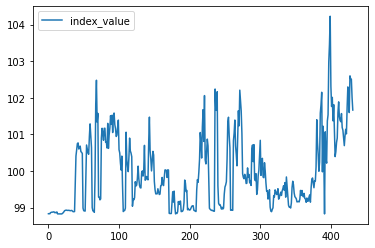

In [10]:
ucry_hedge_df[["start_date", "index_value"]].plot()

In [11]:
pd_to_pg(ucry_hedge_df, table_name="ucry_index")

2022-03-30 18:08:55,218 INFO sqlalchemy.engine.Engine select pg_catalog.version()


[03/30/22] INFO     select pg_catalog.version()                                  ]8;id=19057;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=632665;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\

2022-03-30 18:08:55,224 INFO sqlalchemy.engine.Engine [raw sql] {}


           INFO     [raw sql] {}                                                 ]8;id=181545;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=519471;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-30 18:08:55,228 INFO sqlalchemy.engine.Engine select current_schema()


           INFO     select current_schema()                                      ]8;id=517302;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=26373;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\

2022-03-30 18:08:55,230 INFO sqlalchemy.engine.Engine [raw sql] {}


           INFO     [raw sql] {}                                                 ]8;id=449843;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=461267;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-30 18:08:55,236 INFO sqlalchemy.engine.Engine show standard_conforming_strings


           INFO     show standard_conforming_strings                             ]8;id=286901;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=935111;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\

2022-03-30 18:08:55,238 INFO sqlalchemy.engine.Engine [raw sql] {}


           INFO     [raw sql] {}                                                 ]8;id=881929;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=50654;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-30 18:08:55,243 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s


           INFO     select relname from pg_class c join pg_namespace n on        ]8;id=595512;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=38389;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\
                    n.oid=c.relnamespace where                                               
                    pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s               

2022-03-30 18:08:55,245 INFO sqlalchemy.engine.Engine [generated in 0.00203s] {'name': 'ucry_index'}


           INFO     [generated in 0.00203s] {'name': 'ucry_index'}               ]8;id=616980;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=840011;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-30 18:08:55,256 INFO sqlalchemy.engine.Engine BEGIN (implicit)


           INFO     BEGIN (implicit)                                              ]8;id=820757;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=328595;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#942\942]8;;\

2022-03-30 18:08:55,260 INFO sqlalchemy.engine.Engine INSERT INTO ucry_index (type, start_date, end_date, doc_count, index_value) VALUES (%(type)s, %(start_date)s, %(end_date)s, %(doc_count)s, %(index_value)s)


           INFO     INSERT INTO ucry_index (type, start_date, end_date,          ]8;id=879573;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=420248;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\
                    doc_count, index_value) VALUES (%(type)s, %(start_date)s,                
                    %(end_date)s, %(doc_count)s, %(index_value)s)                            

2022-03-30 18:08:55,262 INFO sqlalchemy.engine.Engine [generated in 0.00334s] ({'type': 'bertweet-hedge', 'start_date': '2013-12-30', 'end_date': '2014-01-05', 'doc_count': 10.0, 'index_value': 98.82973890111552}, {'type': 'bertweet-hedge', 'start_date': '2014-01-06', 'end_date': '2014-01-12', 'doc_count': 18.0, 'index_value': 98.83352363753254}, {'type': 'bertweet-hedge', 'start_date': '2014-01-13', 'end_date': '2014-01-19', 'doc_count': 8.0, 'index_value': 98.82879271701127}, {'type': 'bertweet-hedge', 'start_date': '2014-01-20', 'end_date': '2014-01-26', 'doc_count': 71.0, 'index_value': 98.85859751629522}, {'type': 'bertweet-hedge', 'start_date': '2014-01-27', 'end_date': '2014-02-02', 'doc_count': 91.0, 'index_value': 98.86805935733776}, {'type': 'bertweet-hedge', 'start_date': '2014-02-03', 'end_date': '2014-02-09', 'doc_count': 101.0, 'index_value': 98.87279027785901}, {'type': 'bertweet-hedge', 'start_date': '2014-02-10', 'end_date': '2014-02-16', 'doc_count': 101.0, 'index_val

           INFO     [generated in 0.00334s] ({'type': 'bertweet-hedge',          ]8;id=1601;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=355045;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\
                    'start_date': '2013-12-30', 'end_date': '2014-01-05',                    
                    'doc_count': 10.0, 'index_value': 98.82973890111552},                    
                    {'type': 'bertweet-hedge', 'start_date': '2014-01-06',                   
                    'end_date': '2014-01-12', 'doc_count': 18.0, 'index_value':              
                    98.83352363753254}, {'type': 'bertweet-hedge', 'start_date':             
                    '2014-01-13', 'end_date': '2014-01-19', 'doc_count': 8.0,                
                    'index_value': 98.82879271701127}, {'type':                              
                    'bertweet-hedge', 'start_date': '2014-01-20', 'end_date':                
                    '2014-01-26', 'doc_count': 71.0, 'index_value':                          
                    98.85859751629522}, {'type': 'bertweet-hedge', 'start_date':             
                    '2014-01-27', 'end_date': '2014-02-02', 'doc_count': 91.0,               
                    'index_value': 98.86805935733776}, {'type':                              
                    'bertweet-hedge', 'start_date': '2014-02-03', 'end_date':                
                    '2014-02-09', 'doc_count': 101.0, 'index_value':                         
                    98.87279027785901}, {'type': 'bertweet-hedge', 'start_date':             
                    '2014-02-10', 'end_date': '2014-02-16', 'doc_count': 101.0,              
                    'index_value': 98.87279027785901}, {'type':                              
                    'bertweet-hedge', 'start_date': '2014-02-17', 'end_date':                
                    '2014-02-23', 'doc_count': 118.0, 'index_value':                         
                    98.88083284274516}  ... displaying 10 of 418 total bound                 
                    parameter sets ...  {'type': 'bertweet-hedge', 'start_date':             
                    '2021-12-20', 'end_date': '2021-12-26', 'doc_count': 6714.0,             
                    'index_value': 102.00134801857027}, {'type':                             
                    'bertweet-hedge', 'start_date': '2021-12-27', 'end_date':                
                    '2022-01-02', 'doc_count': 6000.0, 'index_value':                        
                    101.66356029335209})                                                     

2022-03-30 18:08:55,283 INFO sqlalchemy.engine.Engine COMMIT


           INFO     COMMIT                                                       ]8;id=895465;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=458412;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1002\1002]8;;\

           INFO     Number of rows in ucry_index affected: 418                    ]8;id=997677;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/postgres/utils.py\utils.py]8;;\:]8;id=29498;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/postgres/utils.py#42\42]8;;\